In [1]:
import uuid
from datetime import datetime
from enum import Enum
from typing import Any, Tuple, Optional, List

from pydantic.dataclasses import dataclass

# Raw Notebook Code
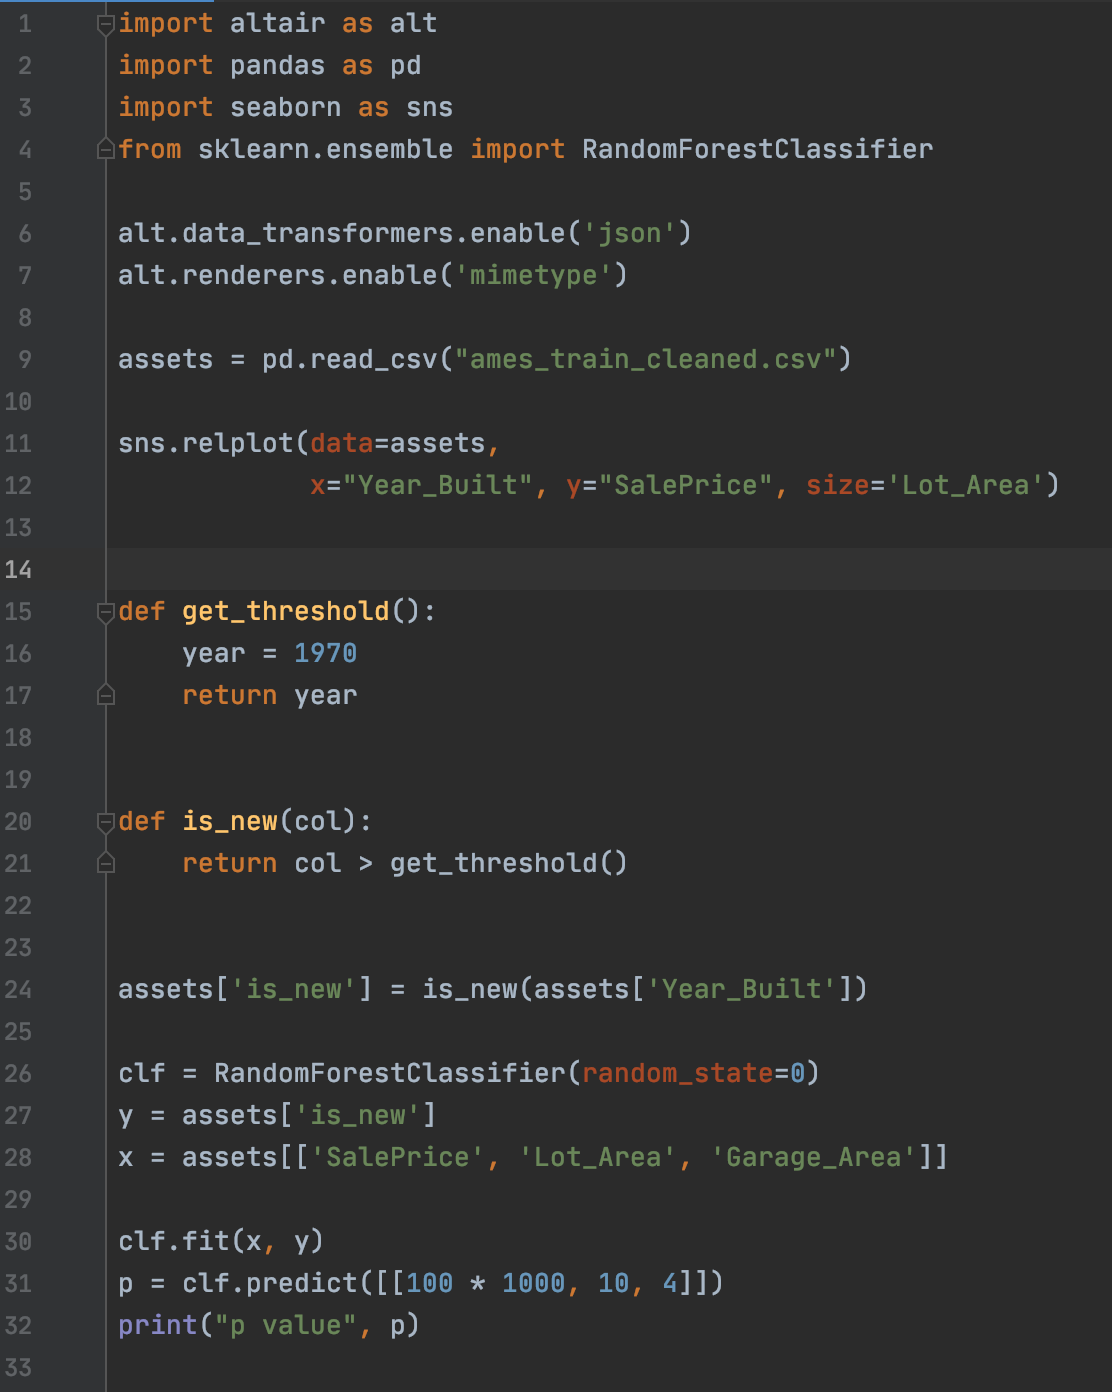

Suppose we know from inspecting the runtime that the library versions are as follows:
* altair=1.0
* pandas=1.20
* seaborn=2.2
* sklearn=2.3


In [2]:
import altair as alt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

alt.data_transformers.enable('json')
alt.renderers.enable('mimetype')

assets = pd.read_csv("ames_train_cleaned.csv")

sns.relplot(data=assets,
            x="Year_Built", y="SalePrice", size='Lot_Area')


def get_threshold():
    x = 1970
    return 1970


def is_new(col):
    return col > get_threshold()


assets['is_new'] = is_new(assets['Year_Built'])

clf = RandomForestClassifier(random_state=0)
y = assets['is_new']
x = assets[['SalePrice', 'Lot_Area', 'Garage_Area']]

clf.fit(x, y)
p = clf.predict([[100 * 1000, 10, 4]])
print("p value", p)

p value [False]


In [4]:
import sys
sys.path.append("/home/ubuntu/linea-dev/lineapy")
from lineapy.graph.data_types import *

ModuleNotFoundError: No module named 'lineapy.graph'

In [5]:
!pwd

/home/ubuntu/linea-dev/lineapy/tests


In [4]:
def get_new_id() -> str:
    return uuid.uuid4()

In [5]:
# import lineapy as ln
# ln.session(name='housing', user_name='bob')
session = SessionContext(uuid=get_new_id(), 
                         session_name='housing',
                         file_name='Housing Price.ipynb',
                         environment_type=SessionType.SCRIPT,
                         creation_time=datetime.now())

In [6]:
# ImportNodes

#ln.import(TODO)
alt_node_context = NodeContext(lines=(1, 1), 
                               columns=(1,21), 
                               execution_time=datetime.now())
alt_node = ImportNode(name='alt', uuid=get_new_id(), 
                      code='import altair as alt', 
                 session_id=session.uuid,
                 context=alt_node_context, 
                 library_name='altair', alias='alt', version='1.0')

pd_node_context = NodeContext(lines=(2, 2), 
                              columns=(1,20), 
                              execution_time=datetime.now())
pd_node = ImportNode(name='pd', uuid=get_new_id(), 
                     code='import pandas as pd', 
                     session_id=session.uuid,
                     context=pd_node_context, 
                     library_name='pandas', alias='pd', version='1.20')

sns_node_context = NodeContext(lines=(3, 3), 
                               columns=(1,22), 
                               execution_time=datetime.now())
sns_node = ImportNode(name='sns', uuid=get_new_id(), 
                      code='import seaborn as sns', 
                      session_id=session.uuid,
                      context=sns_node_context, 
                      library_name='seaborn', alias='sns', version='2.2')

rf_node_context = NodeContext(lines=(4, 4), 
                              columns=(1,52), 
                              execution_time=datetime.now())
rf_node = ImportNode(name='RandomForestClassifier', uuid=get_new_id(),
                     code='from sklearn.ensemble import RandomForestClassifier', 
                 session_id=session.uuid,
                 context=rf_node_context, 
                 library_name='RandomForestClassifier', version='2.3')
lookup = {'alt': alt_node, 
       'pd': pd_node, 
       'sns': sns_node,
       'RandomForestClassifier': rf_node}

In [7]:
alt_node.node_type

<NodeType.ImportNode: 8>

In [8]:
# Altair setup
dt_node_context = NodeContext(lines=(6, 6), 
                              columns=(1,22), 
                              execution_time=datetime.now())
dt_node = Node(name='_auto_attr_0', uuid=get_new_id(), 
                 code='alt.data_transformers', 
                 session_id=session.uuid,
                 context=dt_node_context)

edge1 = DirectedEdge(source_node_id=alt_node.uuid, 
                     sink_node_id=dt_node.uuid)

enable_node_context = NodeContext(lines=(6, 6), 
                              columns=(22,37), 
                              execution_time=datetime.now())
enable_node = Node(name='_auto_call_0', uuid=get_new_id(), 
                   code=".enable('json')", 
                   session_id=session.uuid,
                   context=enable_node_context)

edge2 = DirectedEdge(source_node_id=dt_node.uuid, 
                     sink_node_id=enable_node.uuid)

render_node_context = NodeContext(lines=(7, 7), 
                              columns=(1,14), 
                              execution_time=datetime.now())
render_node = Node(name='_auto_attr_1', uuid=get_new_id(), 
                 code='alt.renderers', 
                 session_id=session.uuid,
                 context=render_node_context)

edge3 = DirectedEdge(source_node_id=alt_node.uuid, 
                     sink_node_id=render_node.uuid)


enable2_node_context = NodeContext(lines=(7, 7), 
                              columns=(14,33), 
                              execution_time=datetime.now())
enable2_node = Node(name='_auto_call_1', uuid=get_new_id(), 
                   code=".enable('mimetype')", 
                   session_id=session.uuid,
                   context=enable2_node_context)

edge4 = DirectedEdge(source_node_id=render_node.uuid, 
                     sink_node_id=enable2_node.uuid)


stub_mutation_node = Node(name='alt_1', uuid=get_new_id(), 
                   code="", 
                   session_id=session.uuid)

edge5 = DirectedEdge(source_node_id=enable_node.uuid, 
                     sink_node_id=stub_mutation_node.uuid)

edge6 = DirectedEdge(source_node_id=enable2_node.uuid, 
                     sink_node_id=stub_mutation_node.uuid)

lookup = {'alt': stub_mutation_node, 
       'pd': pd_node, 
       'sns': sns_node,
       'RandomForestClassifier': rf_node}


In [9]:
assets_node_context = NodeContext(lines=(9, 9), 
                              columns=(1,47), 
                              execution_time=datetime.now())
assets_node = CallNode(name='assets', uuid=get_new_id(), 
                   code=".read_csv('ames_train_cleaned.csv')", 
                   session_id=session.uuid,
                   value=assets,
                   context=assets_node_context) 

edge7 = DirectedEdge(source_node_id=pd_node.uuid, 
                     sink_node_id=assets_node.uuid)

plot_node_context = NodeContext(lines=(11, 12), 
                              columns=(1,60), 
                              execution_time=datetime.now())
plot_node = Node(name='_auto_call_2', uuid=get_new_id(), 
                   code='sns.relplot(data=assets,\nx="Year_Built", y="SalePrice", size="Lot_Area")', 
                   session_id=session.uuid,
                   context=plot_node_context) 
lookup = {'alt': stub_mutation_node, 
       'pd': pd_node, 
       'sns': sns_node,
       'RandomForestClassifier': rf_node,
         'assets': assets_node}

edge8 = DirectedEdge(source_node_id=sns_node.uuid, 
                     sink_node_id=plot_node.uuid)
egde9 = DirectedEdge(source_node_id=assets_node.uuid, 
                    sink_node_id=plot_node.uuid)

ValidationError: 1 validation error for CallNode
args
  field required (type=value_error.missing)

In [ ]:
# Function definitions
# Currently assumes pure functions
threshold_node_context = NodeContext(lines=(15, 16), 
                              columns=(1,16), 
                              execution_time=datetime.now())
threshold_node = Node(name='get_threshold', uuid=get_new_id(), 
                   code='def get_threshold():\n    return 1970', 
                   session_id=session.uuid,
                   value=get_threshold, 
                   context=threshold_node_context) 